In [1]:
# Imports here
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap

<h1>In this project, I will be comparing clustering between basketball players in the 90s compared to basketball players of the past 5 years to see differences in clustering methods to test whether basketball position roles have changed. </h1>

<h2><center>
    The Evolution of Positionless Basketball
    </center>
    </h2>

<center>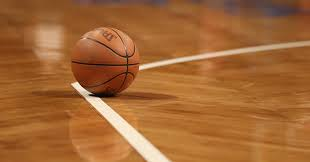</center>

Discuss context - inspiration of gsw success with positionless basketball and comparing to 90s, 5 different positions of basketball, dominant bigs of 90s transitioning to agile and skilled downsized bigs of today. shooting guards specialized in 3, today sg and sf clumped as wings

In [2]:
from IPython.display import HTML
HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script> 
    The raw code for this IPython notebook is by default hidden for easier reading.
    To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
basketball_df = pd.read_csv(r'C:\Users\Brian\Desktop\Seasons_Stats.csv')

In [4]:
basketball_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


<h1>I used several datasets from Kaggle that had players from each era to compare. I selected players that had substantial playing time, and focused on stats that showed efficiency rates instead of volume stats. </h1>

<h2><center>
Data Cleaning and Preprocessing
</center></h2>

- Select group of players qualified by sufficient playing time
- Reduce dimensionality by handpicking more valuable variables
- Redefining ambiguous position labels

talk about how I got data - 3 datasets from kaggle,  also go over preprocessing - dropping columns, dropping nulls, sorting out positions such as pf-sf. talk about volume vs % stats/rates and impact on clustering

In [5]:
traditional = basketball_df.loc[(basketball_df['Year'] >= 1990) & (basketball_df['Year'] < 2000)]
traditional['MPG'] = traditional['MP']/traditional['G']
traditional = traditional.loc[(traditional['MPG'] >= 20) & (traditional['G'] > 40)]
display(traditional.head())

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
9547,9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,154.0,277.0,431.0,67.0,36.0,25.0,70.0,248.0,362.0,21.137500
9548,9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,49.0,176.0,225.0,495.0,121.0,3.0,141.0,133.0,1221.0,34.050633
9549,9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,117.0,188.0,305.0,145.0,34.0,19.0,121.0,201.0,1099.0,25.705128
9550,9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,69.0,257.0,326.0,453.0,113.0,18.0,185.0,238.0,1342.0,36.360000
9551,9551,1990.0,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,...,151.0,223.0,374.0,142.0,60.0,39.0,101.0,219.0,860.0,23.085366


In [6]:
display(basketball_df.columns)

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [7]:
traditional.Year.value_counts()

1998.0    226
1996.0    218
1997.0    205
1990.0    196
1994.0    195
1991.0    192
1995.0    190
1992.0    190
1993.0    186
1999.0    165
Name: Year, dtype: int64

In [8]:
traditional.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 9547 to 14467
Data columns (total 54 columns):
Unnamed: 0    1963 non-null int64
Year          1963 non-null float64
Player        1963 non-null object
Pos           1963 non-null object
Age           1963 non-null float64
Tm            1963 non-null object
G             1963 non-null float64
GS            1963 non-null float64
MP            1963 non-null float64
PER           1963 non-null float64
TS%           1963 non-null float64
3PAr          1963 non-null float64
FTr           1963 non-null float64
ORB%          1963 non-null float64
DRB%          1963 non-null float64
TRB%          1963 non-null float64
AST%          1963 non-null float64
STL%          1963 non-null float64
BLK%          1963 non-null float64
TOV%          1963 non-null float64
USG%          1963 non-null float64
blanl         0 non-null float64
OWS           1963 non-null float64
DWS           1963 non-null float64
WS            1963 non-null float

In [9]:
traditional.drop(columns=['blanl', 'blank2', 'Unnamed: 0'], inplace=True)

In [10]:
traditional.dropna(inplace=True)
traditional.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 9547 to 14467
Data columns (total 51 columns):
Year      1845 non-null float64
Player    1845 non-null object
Pos       1845 non-null object
Age       1845 non-null float64
Tm        1845 non-null object
G         1845 non-null float64
GS        1845 non-null float64
MP        1845 non-null float64
PER       1845 non-null float64
TS%       1845 non-null float64
3PAr      1845 non-null float64
FTr       1845 non-null float64
ORB%      1845 non-null float64
DRB%      1845 non-null float64
TRB%      1845 non-null float64
AST%      1845 non-null float64
STL%      1845 non-null float64
BLK%      1845 non-null float64
TOV%      1845 non-null float64
USG%      1845 non-null float64
OWS       1845 non-null float64
DWS       1845 non-null float64
WS        1845 non-null float64
WS/48     1845 non-null float64
OBPM      1845 non-null float64
DBPM      1845 non-null float64
BPM       1845 non-null float64
VORP      1845 non-null floa

In [11]:
traditional.Pos.value_counts()

PG       408
SF       396
SG       396
PF       384
C        256
SG-SF      3
SF-SG      1
SF-PF      1
Name: Pos, dtype: int64

In [12]:
display(traditional.loc[traditional.Pos.isin(['SF-PF', 'SF-SG', 'SG-SF'])])

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
12000,1995.0,Tom Gugliotta,SF-PF,25.0,TOT,77.0,63.0,2568.0,15.2,0.515,...,165.0,407.0,572.0,279.0,132.0,62.0,189.0,203.0,976.0,33.350649
13078,1997.0,Jim Jackson,SG-SF,26.0,TOT,77.0,77.0,2831.0,15.1,0.526,...,132.0,279.0,411.0,316.0,86.0,32.0,208.0,194.0,1226.0,36.766234
13711,1998.0,Aaron McKie,SG-SF,25.0,TOT,81.0,32.0,1813.0,8.6,0.410,...,58.0,173.0,231.0,175.0,101.0,13.0,76.0,164.0,332.0,22.382716
13858,1998.0,Jerry Stackhouse,SG-SF,23.0,TOT,79.0,37.0,2545.0,16.2,0.532,...,105.0,161.0,266.0,241.0,89.0,59.0,224.0,175.0,1249.0,32.215190
14195,1999.0,Eddie Jones,SF-SG,27.0,TOT,50.0,50.0,1881.0,18.5,0.546,...,50.0,144.0,194.0,186.0,125.0,58.0,93.0,128.0,780.0,37.620000


In [13]:
traditional.loc[traditional.Player == 'Tom Gugliotta', 'Pos'] = 'PF'
traditional.loc[traditional.Player == 'Jim Jackson', 'Pos'] = 'SG'
traditional.loc[traditional.Player == 'Aaron McKie', 'Pos'] = 'SG'
traditional.loc[traditional.Player == 'Jerry Stackhouse', 'Pos'] = 'SG'
traditional.loc[traditional.Player == 'Eddie Jones', 'Pos'] = 'SG'

In [14]:
traditional.Pos.value_counts()

PG    408
SG    400
SF    395
PF    386
C     256
Name: Pos, dtype: int64

In [15]:
X_traditional = traditional.drop(columns=['Year', 'Player', 'Pos', 'Tm', 'G', 'GS', 'MPG', 'Age', 'MP', 'FTA', 'WS', '3PA', 
                               '2PA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'VORP', 'FG', 'FGA', 'FG%',
                                'PER', 'OWS', 'DWS', 'WS/48', 'BPM', 'OBPM', 'DBPM'])

In [16]:
X_traditional.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 9547 to 14467
Data columns (total 18 columns):
TS%     1845 non-null float64
3PAr    1845 non-null float64
FTr     1845 non-null float64
ORB%    1845 non-null float64
DRB%    1845 non-null float64
TRB%    1845 non-null float64
AST%    1845 non-null float64
STL%    1845 non-null float64
BLK%    1845 non-null float64
TOV%    1845 non-null float64
USG%    1845 non-null float64
3P      1845 non-null float64
3P%     1845 non-null float64
2P      1845 non-null float64
2P%     1845 non-null float64
eFG%    1845 non-null float64
FT      1845 non-null float64
FT%     1845 non-null float64
dtypes: float64(18)
memory usage: 273.9 KB


briefly go over each variable. efg captures 3p%, ts captures ft%. do need some volume variables(eg very high 3P% but low volume skews).

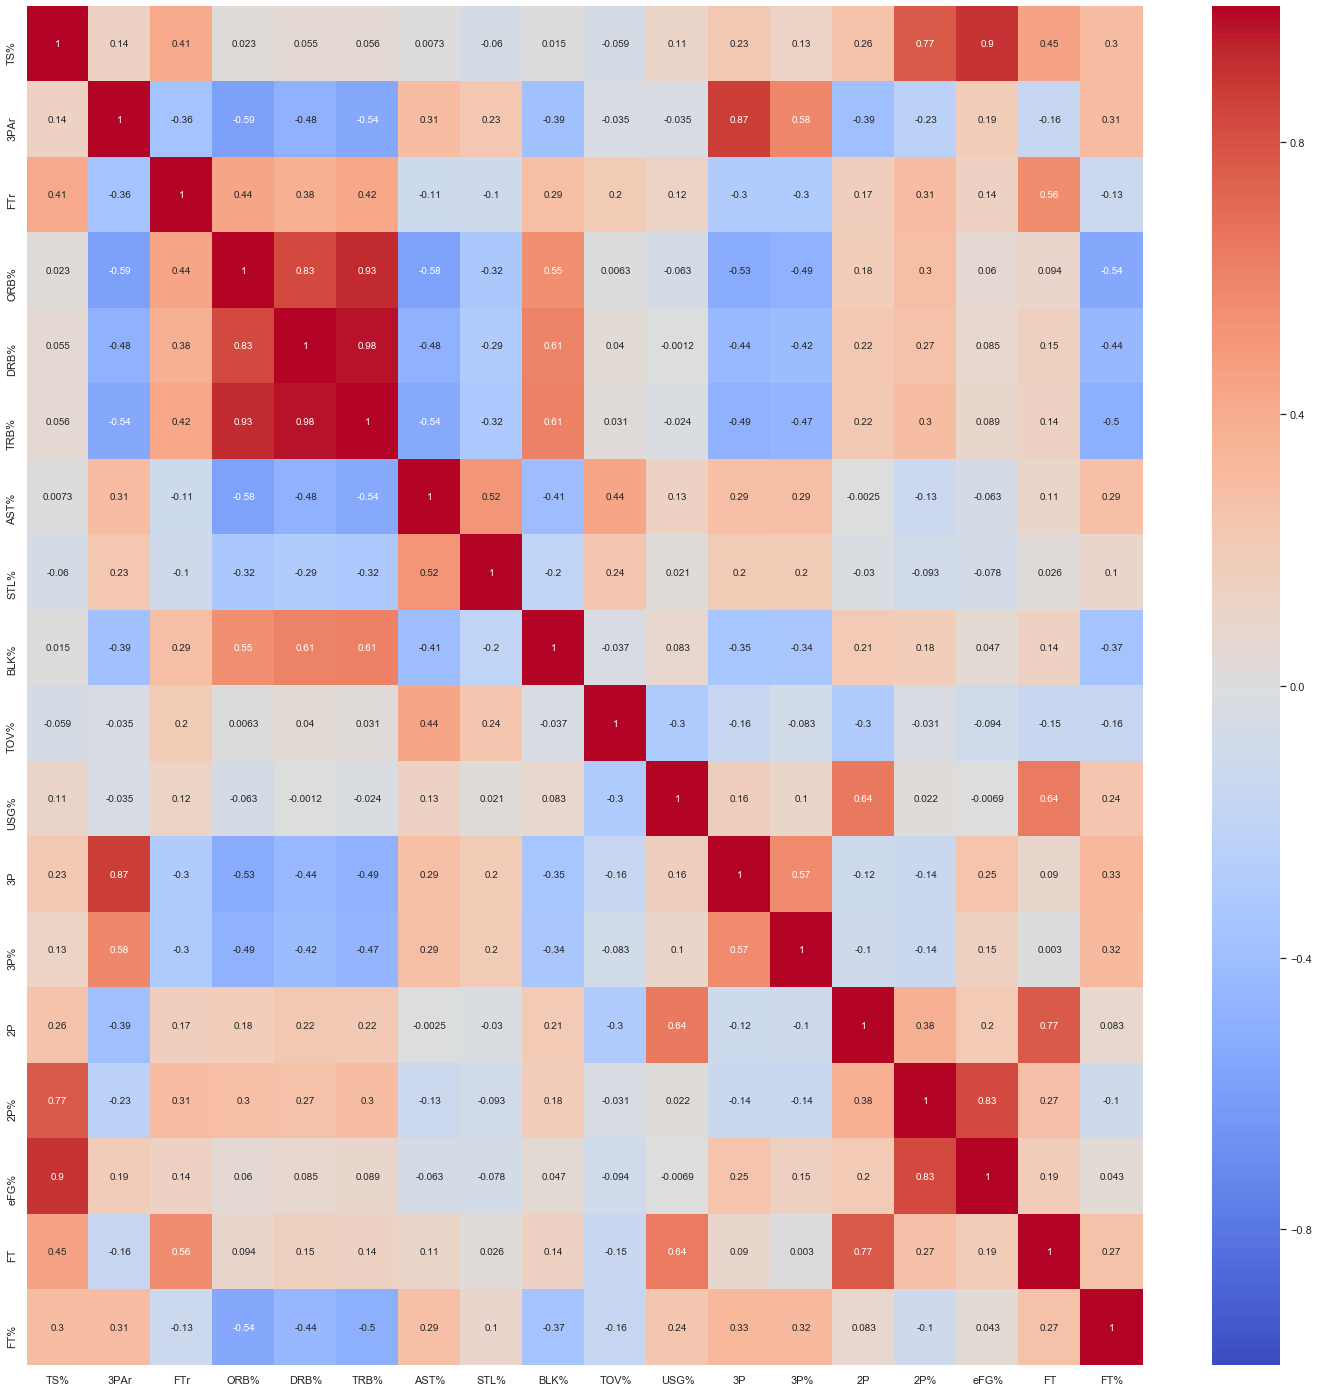

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(X_traditional.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);


In [18]:
scaler = StandardScaler()
X_traditional_scaled = scaler.fit_transform(X_traditional)

In [19]:
X_traditional_scaled

array([[ 6.75705598e-03, -8.62838175e-01,  8.38718813e-01, ...,
        -6.69129992e-02, -9.72235346e-01, -7.34662769e-01],
       [ 1.54877075e-01,  1.93230495e+00, -3.42253434e-02, ...,
        -2.44728099e-01,  6.83035850e-01,  1.08063478e+00],
       [ 2.04250415e-01, -2.68126871e-01, -3.19610933e-01, ...,
         3.39521515e-01,  8.33291644e-03,  6.47631111e-04],
       ...,
       [-4.62289671e-01, -8.95877691e-01,  1.50435920e-01, ...,
        -1.43119471e-01, -6.39381899e-01, -1.35508092e+00],
       [-1.15351643e+00, -9.28917208e-01,  2.17585471e-01, ...,
        -1.87046615e+00, -5.49421508e-01,  9.54253306e-01],
       [-5.85723021e-01, -9.28917208e-01,  1.08213593e+00, ...,
        -8.54379870e-01, -9.90227425e-01, -7.34662769e-01]])

In [20]:
pca = PCA(n_components=2)
traditional_pca_components = pca.fit_transform(X_traditional_scaled)

<h1>
Here I check visualizations of PCA and UMAP, but found more useful information from the cluster centers of KMeans.
    </h1>

<h2><center>
    Visualization of Traditional Players Dataset
    </center></h2>

In [21]:
kmeans_traditional = KMeans(n_clusters=5, random_state=42)
kmeans_traditional.fit(X_traditional_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

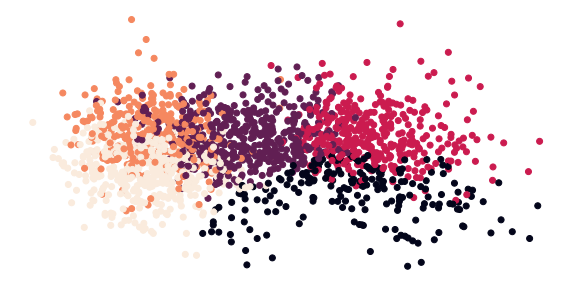

In [22]:
plt.figure(figsize=(10,5))
y_pred_traditional = kmeans_traditional.predict(X_traditional_scaled)
plt.scatter(traditional_pca_components[:,0], traditional_pca_components[:,1], c=y_pred_traditional)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [23]:
umap_results = umap.UMAP(n_neighbors=6,
                      min_dist=.5,
                      metric='correlation').fit_transform(X_traditional_scaled)

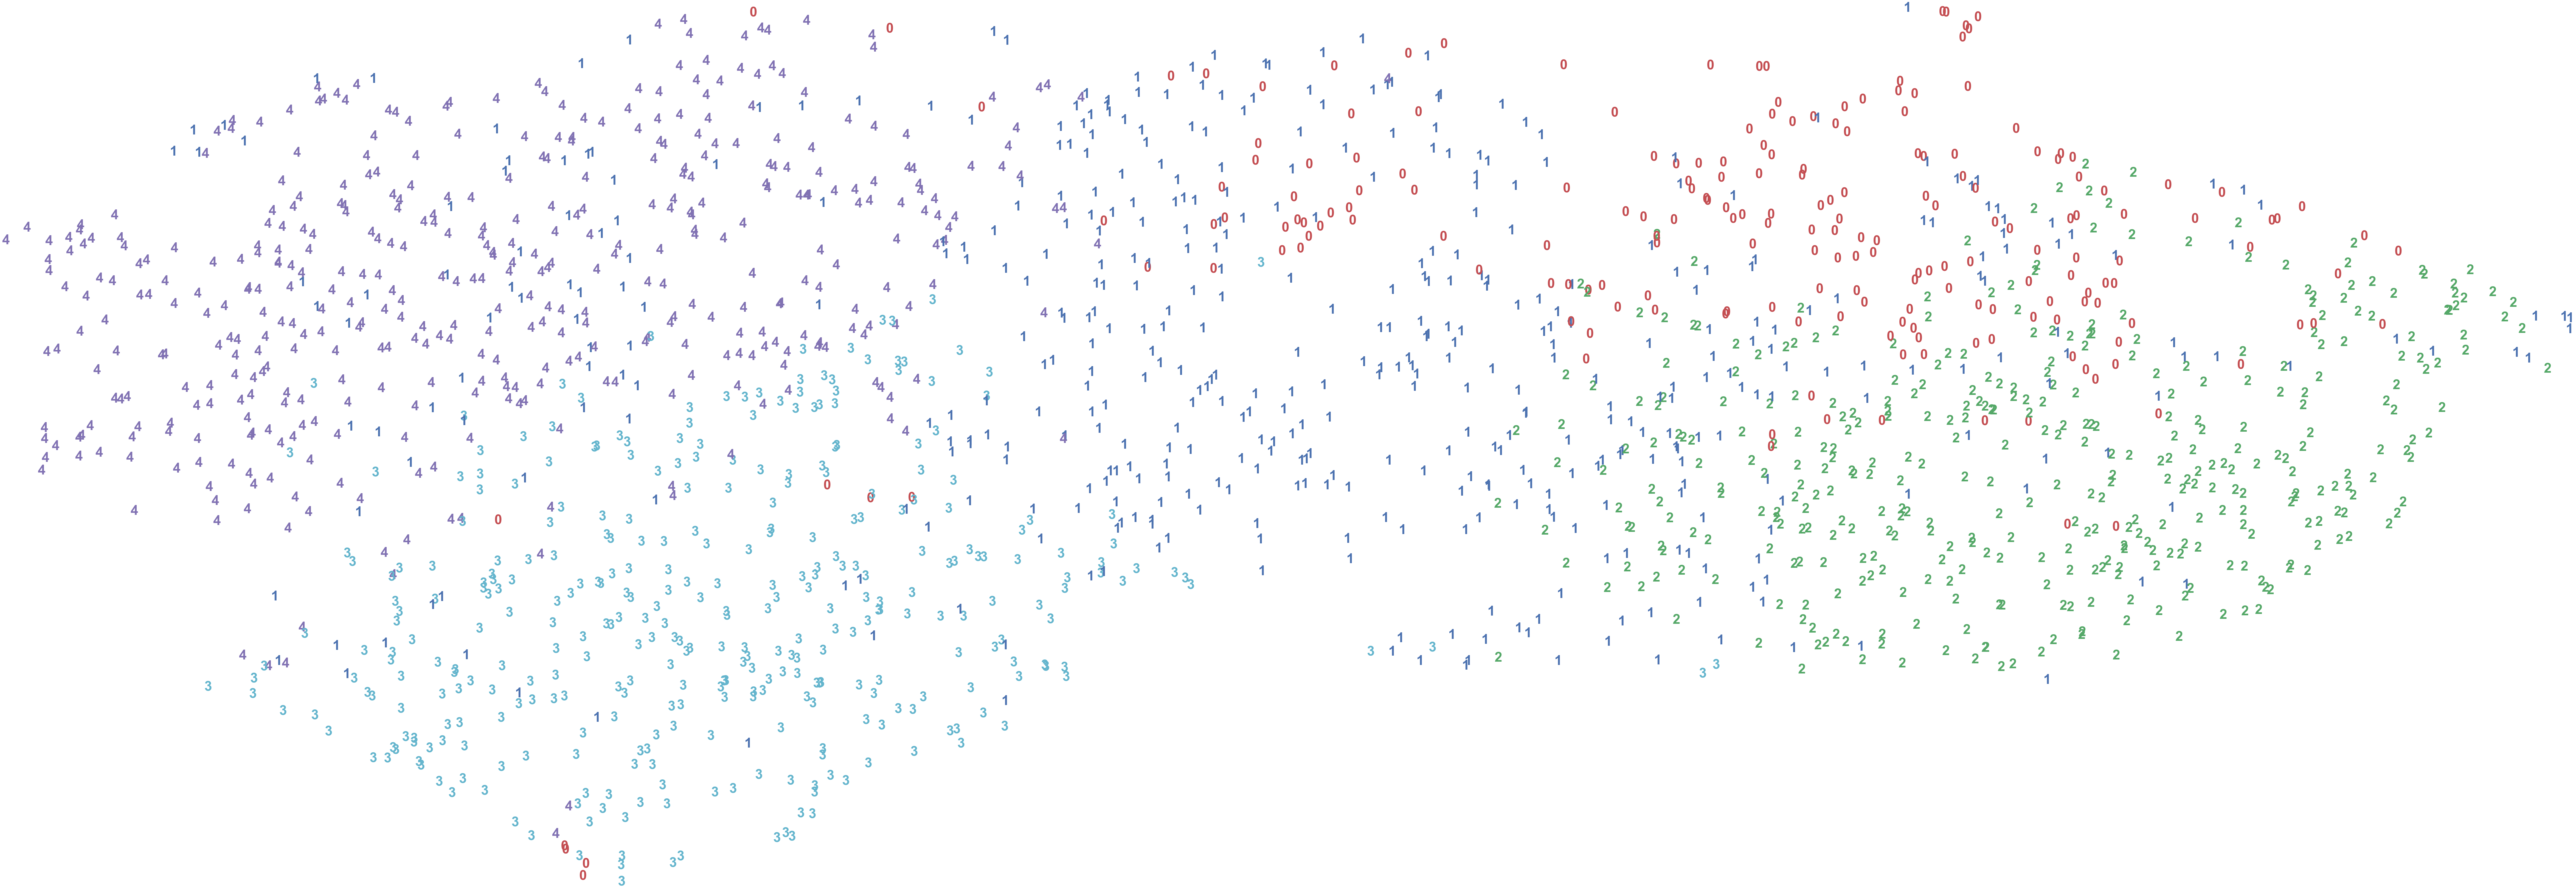

In [24]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y_pred_traditional[i],
             color=colours[int(y_pred_traditional[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

not much to see in pca, but note how cluster centers show much more info

In [25]:
traditional_centers = scaler.inverse_transform(kmeans_traditional.cluster_centers_)

<h2><center>
    Cluster Centers of Traditional Players
    </center></h2>

In [26]:
traditional_centers_df = pd.DataFrame(traditional_centers, columns = ['TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
                                                                      'STL%', 'BLK%','TOV%', 'USG%', '3P', '3P%', '2P', '2P%',
                                                                      'eFG%','FT', 'FT%'])
display(traditional_centers_df)

,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,3P,3P%,2P,2P%,eFG%,FT,FT%
0,0.571864,0.047947,0.428583,8.550971,19.502427,14.127670,14.969903,1.749515,2.418932,13.029126,25.785922,18.218447,0.213718,583.563107,0.521432,0.518248,375.334951,0.758563
1,0.511599,0.093021,0.284988,5.962994,12.568191,9.228482,12.208940,1.697297,1.221206,12.099376,21.411642,22.116424,0.256615,340.648649,0.467784,0.467665,173.459459,0.760701
2,0.536628,0.018661,0.395565,10.506250,19.873438,15.170312,7.962500,1.382552,2.358854,14.646875,17.664323,2.466146,0.116539,287.119792,0.500534,0.497122,153.385417,0.674401
3,0.515715,0.176605,0.290643,2.978963,8.712104,5.845533,29.786455,2.421037,0.461095,17.408069,18.904323,36.515850,0.290040,254.008646,0.462991,0.469983,149.276657,0.770622
4,0.560923,0.336478,0.267614,3.148712,9.329040,6.262061,17.939578,1.877283,0.651288,12.289930,20.807026,104.351288,0.382232,283.793911,0.486529,0.518454,189.880562,0.810724


In [27]:
traditional_cluster = kmeans_traditional.predict(X_traditional_scaled)

In [28]:
traditional['cluster'] = traditional_cluster
traditional

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG,cluster
9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,0.536,...,277.0,431.0,67.0,36.0,25.0,70.0,248.0,362.0,21.137500,2
9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,0.542,...,176.0,225.0,495.0,121.0,3.0,141.0,133.0,1221.0,34.050633,4
9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,0.544,...,188.0,305.0,145.0,34.0,19.0,121.0,201.0,1099.0,25.705128,1
9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,0.528,...,257.0,326.0,453.0,113.0,18.0,185.0,238.0,1342.0,36.360000,4
9551,1990.0,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,0.510,...,223.0,374.0,142.0,60.0,39.0,101.0,219.0,860.0,23.085366,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14450,1999.0,Jason Williams,PG,23.0,SAC,50.0,50.0,1805.0,12.8,0.483,...,139.0,153.0,299.0,95.0,1.0,143.0,91.0,641.0,36.100000,3
14460,1999.0,Walt Williams,SF,28.0,POR,48.0,16.0,1044.0,16.3,0.566,...,107.0,143.0,80.0,37.0,28.0,63.0,101.0,446.0,21.750000,4
14461,1999.0,Corliss Williamson,SF,25.0,SAC,50.0,50.0,1374.0,14.7,0.517,...,121.0,206.0,66.0,30.0,8.0,75.0,118.0,659.0,27.480000,1
14462,1999.0,Kevin Willis,C,36.0,TOR,42.0,38.0,1216.0,15.6,0.489,...,241.0,350.0,67.0,28.0,28.0,86.0,134.0,504.0,28.952381,2


point out 3PAr, TRB%, AST%/TOV% and how those have significant differences compared to others like TS% or 2P%

<h1>
I compare here the relationship between cluster assignments and the position variable.
    </h1>

<h2><center>
    Crosstab of Traditional Players Positions and Cluster Assignment
    </center></h2>

In [29]:
display(pd.crosstab(traditional['Pos'], traditional['cluster']))

cluster,0,1,2,3,4
Pos,,,,,
C,60,36,158,0,2
PF,84,94,195,0,13
PG,5,7,0,286,110
SF,41,207,30,6,111
SG,16,137,1,55,191


In [30]:
traditional_0 = traditional.loc[traditional.cluster == 0]
traditional_1 = traditional.loc[traditional.cluster == 1]
traditional_2 = traditional.loc[traditional.cluster == 2]
traditional_3 = traditional.loc[traditional.cluster == 3]
traditional_4 = traditional.loc[traditional.cluster == 4]

In [31]:
traditional_cluster_dummies = pd.concat([traditional.drop(columns='cluster'), pd.get_dummies(traditional['cluster'],
                            prefix='cluster')], axis=1)
traditional_cluster_dummies

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,MPG,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,0.536,...,25.0,70.0,248.0,362.0,21.137500,0,0,1,0,0
9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,0.542,...,3.0,141.0,133.0,1221.0,34.050633,0,0,0,0,1
9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,0.544,...,19.0,121.0,201.0,1099.0,25.705128,0,1,0,0,0
9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,0.528,...,18.0,185.0,238.0,1342.0,36.360000,0,0,0,0,1
9551,1990.0,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,0.510,...,39.0,101.0,219.0,860.0,23.085366,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14450,1999.0,Jason Williams,PG,23.0,SAC,50.0,50.0,1805.0,12.8,0.483,...,1.0,143.0,91.0,641.0,36.100000,0,0,0,1,0
14460,1999.0,Walt Williams,SF,28.0,POR,48.0,16.0,1044.0,16.3,0.566,...,28.0,63.0,101.0,446.0,21.750000,0,0,0,0,1
14461,1999.0,Corliss Williamson,SF,25.0,SAC,50.0,50.0,1374.0,14.7,0.517,...,8.0,75.0,118.0,659.0,27.480000,0,1,0,0,0
14462,1999.0,Kevin Willis,C,36.0,TOR,42.0,38.0,1216.0,15.6,0.489,...,28.0,86.0,134.0,504.0,28.952381,0,0,1,0,0


<h1>
    I repeat the process of cleaning, scaling, and clustering with the dataset on recent players.
    </h1>

In [32]:
modern = basketball_df.loc[(basketball_df['Year'] >= 2014)]
modern.Year.value_counts()

2015.0    651
2014.0    611
2017.0    595
2016.0    578
Name: Year, dtype: int64

In [33]:
basketball_df_2 = pd.read_csv(r'C:\Users\Brian\Desktop\nba.csv')
basketball_df_3 = pd.read_csv(r'C:\Users\Brian\Desktop\nba_extra.csv')

In [34]:
basketball_df_2.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [35]:
basketball_df_3.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [36]:
new_basketball_df_2 = basketball_df_2[['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP']]

In [37]:
new_basketball_df_3 = basketball_df_3[['GS', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]

In [38]:
new_names = []
for name in new_basketball_df_2['Player'].values:
    new_names.append(name.replace('\\', '_').split('_')[0])

In [39]:
new_basketball_df_2['Player'] = new_names

In [40]:
modern = pd.concat([new_basketball_df_2, new_basketball_df_3], join='inner', axis=1)
modern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 50 columns):
Player         664 non-null object
Pos            664 non-null object
Age            664 non-null int64
Tm             664 non-null object
G              664 non-null int64
MP             664 non-null int64
PER            664 non-null float64
TS%            660 non-null float64
3PAr           660 non-null float64
FTr            660 non-null float64
ORB%           664 non-null float64
DRB%           664 non-null float64
TRB%           664 non-null float64
AST%           664 non-null float64
STL%           664 non-null float64
BLK%           664 non-null float64
TOV%           660 non-null float64
USG%           664 non-null float64
Unnamed: 19    0 non-null float64
OWS            664 non-null float64
DWS            664 non-null float64
WS             664 non-null float64
WS/48          664 non-null float64
OBPM           664 non-null float64
DBPM           664 non-null float64
BPM   

In [41]:
modern['Year'] = 2018
modern.Year.value_counts()

2018    664
Name: Year, dtype: int64

In [42]:
modern = pd.concat([modern, basketball_df.loc[basketball_df['Year']>=2014]], join='inner', axis=0)
modern.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3099 entries, 0 to 24690
Data columns (total 50 columns):
Player    3099 non-null object
Pos       3099 non-null object
Age       3099 non-null float64
Tm        3099 non-null object
G         3099 non-null float64
MP        3099 non-null float64
PER       3099 non-null float64
TS%       3081 non-null float64
3PAr      3081 non-null float64
FTr       3081 non-null float64
ORB%      3099 non-null float64
DRB%      3099 non-null float64
TRB%      3099 non-null float64
AST%      3099 non-null float64
STL%      3099 non-null float64
BLK%      3099 non-null float64
TOV%      3084 non-null float64
USG%      3099 non-null float64
OWS       3099 non-null float64
DWS       3099 non-null float64
WS        3099 non-null float64
WS/48     3099 non-null float64
OBPM      3099 non-null float64
DBPM      3099 non-null float64
BPM       3099 non-null float64
VORP      3099 non-null float64
GS        3099 non-null float64
FG        3099 non-null float64

In [43]:
modern['MPG'] = modern['MP']/modern['G']
modern.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'GS', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year', 'MPG'],
      dtype='object')

In [44]:
modern.dropna(inplace=True)

In [45]:
modern = modern.loc[(modern['MPG'] >= 20) & (modern['G'] > 40)]
modern.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MPG
2,Steven Adams,C,24.0,OKC,76.0,2487.0,20.6,0.630,0.003,0.402,...,301.0,685.0,88.0,92.0,78.0,128.0,215.0,1056.0,2018.0,32.723684
6,LaMarcus Aldridge,C,32.0,SAS,75.0,2509.0,25.0,0.570,0.068,0.296,...,389.0,635.0,152.0,43.0,90.0,111.0,161.0,1735.0,2018.0,33.453333
7,Jarrett Allen,C,19.0,BRK,72.0,1441.0,17.5,0.636,0.038,0.370,...,244.0,388.0,49.0,28.0,88.0,82.0,147.0,587.0,2018.0,20.013889
10,Al-Farouq Aminu,PF,27.0,POR,69.0,2072.0,12.0,0.522,0.582,0.137,...,428.0,525.0,84.0,79.0,40.0,79.0,136.0,644.0,2018.0,30.028986
12,Kyle Anderson,SF,24.0,SAS,74.0,1978.0,15.9,0.582,0.130,0.333,...,312.0,396.0,202.0,115.0,60.0,94.0,114.0,585.0,2018.0,26.729730


In [46]:
modern.loc[modern.Pos.isin(['PF-SF', 'PG-SG', 'SF-PF', 'SF-SG', 'SG-PG', 'SG-SF'])]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MPG
22733,John Salmons,SG-SF,34.0,TOT,78.0,1726.0,7.8,0.462,0.395,0.126,...,143.0,163.0,147.0,47.0,19.0,54.0,124.0,403.0,2014.0,22.128205
22820,Greivis Vasquez,SG-PG,27.0,TOT,79.0,1779.0,14.1,0.537,0.439,0.164,...,153.0,173.0,323.0,31.0,5.0,128.0,143.0,758.0,2014.0,22.518987
22844,Derrick Williams,SF-PF,22.0,TOT,78.0,1820.0,11.5,0.524,0.205,0.537,...,252.0,323.0,56.0,48.0,20.0,76.0,114.0,624.0,2014.0,23.333333
23029,Goran Dragic,SG-PG,28.0,TOT,78.0,2640.0,17.4,0.577,0.258,0.234,...,193.0,274.0,350.0,78.0,15.0,173.0,195.0,1275.0,2015.0,33.846154
23193,Brandon Knight,PG-SG,23.0,TOT,63.0,2035.0,17.1,0.543,0.361,0.251,...,216.0,244.0,330.0,90.0,10.0,189.0,114.0,1070.0,2015.0,32.301587
23326,Quincy Pondexter,SF-SG,26.0,TOT,75.0,1793.0,9.9,0.550,0.546,0.215,...,142.0,195.0,94.0,19.0,24.0,51.0,150.0,538.0,2015.0,23.906667
23356,Austin Rivers,PG-SG,22.0,TOT,76.0,1563.0,10.3,0.481,0.264,0.254,...,125.0,152.0,155.0,48.0,14.0,65.0,146.0,530.0,2015.0,20.565789
23439,Lance Thomas,PF-SF,26.0,TOT,62.0,1490.0,8.0,0.456,0.050,0.224,...,130.0,195.0,69.0,37.0,8.0,74.0,101.0,443.0,2015.0,24.032258


In [47]:
modern.loc[modern.Player == 'John Salmons', 'Pos'] = 'SG'
modern.loc[modern.Player == 'Greivis Vasquez', 'Pos'] = 'PG'
modern.loc[modern.Player == 'Derrick Williams', 'Pos'] = 'SF'
modern.loc[modern.Player == 'Goran Dragic', 'Pos'] = 'SG'
modern.loc[modern.Player == 'Brandon Knight', 'Pos'] = 'SG'
modern.loc[modern.Player == 'Quincy Pondexter', 'Pos'] = 'SF'
modern.loc[modern.Player == 'Austin Rivers', 'Pos'] = 'SG'
modern.loc[modern.Player == 'Lance Thomas', 'Pos'] = 'PF'

In [48]:
X_modern = modern[['TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', '3P', '3P%', '2P', '2P%', 'eFG%', 'FT', 'FT%']]

In [49]:
X_modern_scaled = scaler.fit_transform(X_modern)

In [50]:
X_modern_scaled

array([[ 2.05883259, -1.66467322,  1.14652255, ...,  2.73282575,
         0.04302455, -2.29943284],
       [ 0.59297738, -1.31387752,  0.26080802, ...,  0.25058271,
         1.63557674,  0.72941028],
       [ 2.20541811, -1.47578323,  0.87913703, ...,  1.98132098,
        -0.377995  ,  0.06480801],
       ...,
       [ 1.03273394,  1.90804599, -1.02598478, ...,  1.25258907,
        -0.71664115,  0.93641754],
       [ 0.39753001, -0.75260442, -1.16803334, ...,  1.16149759,
        -1.00952431, -2.69165713],
       [ 1.42362866, -1.67007007,  1.48075445, ...,  1.41199918,
        -0.20409562, -0.99201855]])

In [51]:
modern_pca_components = pca.fit_transform(X_modern_scaled)

Centers and PF share cluster, rest hav etheir own

<h2><center>
    Visualization of Modern Players Dataset
    </center></h2>

In [52]:
kmeans_modern = KMeans(n_clusters=5, random_state=42)
kmeans_modern.fit(X_modern_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

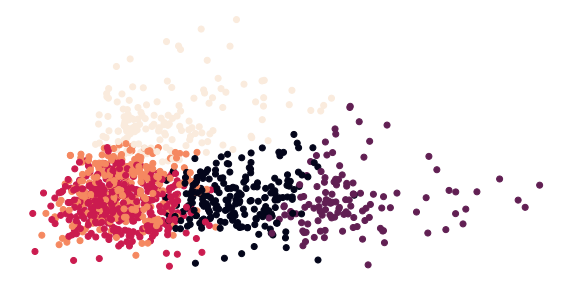

In [53]:
plt.figure(figsize=(10,5))
y_pred_modern = kmeans_modern.predict(X_modern_scaled)
plt.scatter(modern_pca_components[:,0], modern_pca_components[:,1], c=y_pred_modern)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [54]:
umap_results = umap.UMAP(n_neighbors=6,
                      min_dist=.5,
                      metric='correlation').fit_transform(X_modern_scaled)

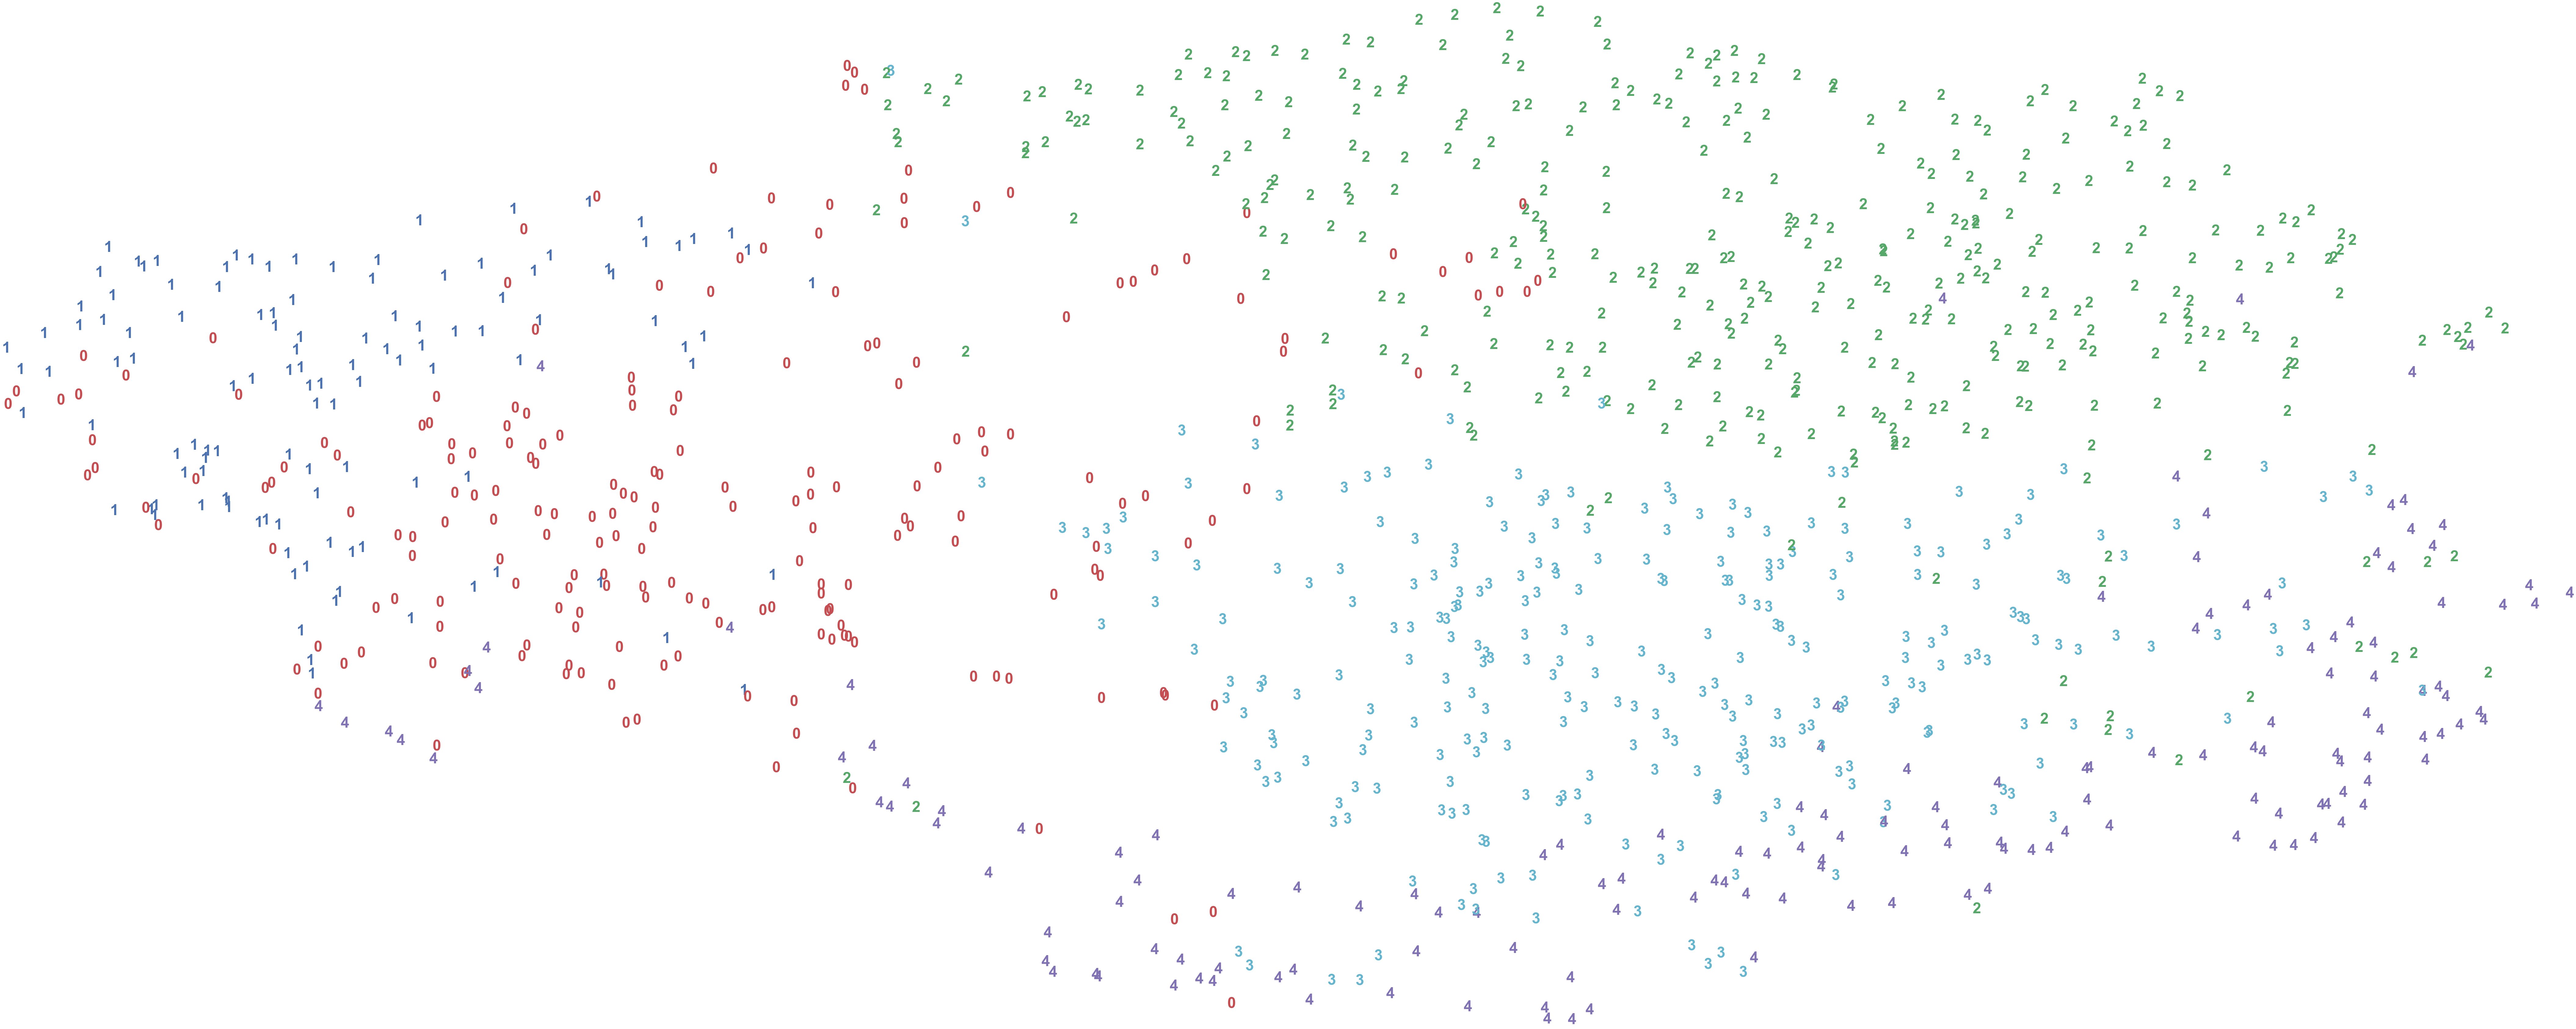

In [55]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y_pred_modern[i],
             color=colours[int(y_pred_modern[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

<h2><center>
    Cluster Centers of Modern Players Dataset
    </center></h2>

In [56]:
modern_centers = scaler.inverse_transform(kmeans_modern.cluster_centers_)
modern_centers_df = pd.DataFrame(modern_centers, columns = ['TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', '3P', '3P%', '2P', '2P%', 'eFG%',
       'FT', 'FT%'])
display(modern_centers_df)

,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,3P,3P%,2P,2P%,eFG%,FT,FT%
0,0.533811,0.172214,0.270010,6.872330,19.971359,13.397573,11.496602,1.543689,2.338350,11.946602,20.987379,42.101942,0.305539,300.000000,0.499034,0.498364,144.252427,0.734291
1,0.581832,0.029824,0.409706,11.236975,23.610084,17.431092,9.297479,1.373950,3.494118,13.404202,19.456303,6.873950,0.130000,356.739496,0.557672,0.553387,178.226891,0.672504
2,0.557752,0.477191,0.192896,2.714441,12.091826,7.399728,10.541417,1.522071,0.970027,10.511717,17.553134,113.370572,0.377828,164.948229,0.490654,0.528779,98.059946,0.792471
3,0.508164,0.321465,0.244665,2.339636,11.092000,6.684000,22.707273,1.787636,0.774545,15.022545,20.411273,65.901818,0.330062,198.192727,0.449302,0.468360,122.141818,0.772556
4,0.571859,0.302590,0.351942,2.931410,13.571154,8.289744,26.872436,1.951282,1.045513,12.608333,27.987179,132.679487,0.361026,411.205128,0.496724,0.514269,345.506410,0.834526


In [57]:
modern_cluster = kmeans_modern.predict(X_modern_scaled)
modern['cluster'] = modern_cluster
modern

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MPG,cluster
2,Steven Adams,C,24.0,OKC,76.0,2487.0,20.6,0.630,0.003,0.402,...,685.0,88.0,92.0,78.0,128.0,215.0,1056.0,2018.0,32.723684,1
6,LaMarcus Aldridge,C,32.0,SAS,75.0,2509.0,25.0,0.570,0.068,0.296,...,635.0,152.0,43.0,90.0,111.0,161.0,1735.0,2018.0,33.453333,0
7,Jarrett Allen,C,19.0,BRK,72.0,1441.0,17.5,0.636,0.038,0.370,...,388.0,49.0,28.0,88.0,82.0,147.0,587.0,2018.0,20.013889,1
10,Al-Farouq Aminu,PF,27.0,POR,69.0,2072.0,12.0,0.522,0.582,0.137,...,525.0,84.0,79.0,40.0,79.0,136.0,644.0,2018.0,30.028986,2
12,Kyle Anderson,SF,24.0,SAS,74.0,1978.0,15.9,0.582,0.130,0.333,...,396.0,202.0,115.0,60.0,94.0,114.0,585.0,2018.0,26.729730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24668,Lou Williams,SG,30.0,LAL,58.0,1403.0,23.9,0.609,0.432,0.469,...,132.0,183.0,65.0,10.0,120.0,67.0,1078.0,2017.0,24.189655,4
24670,Marvin Williams,PF,30.0,CHO,76.0,2295.0,13.7,0.551,0.503,0.213,...,498.0,106.0,58.0,53.0,60.0,134.0,849.0,2017.0,30.197368,2
24684,Nick Young,SG,31.0,LAL,60.0,1556.0,14.1,0.588,0.665,0.142,...,137.0,58.0,37.0,14.0,36.0,137.0,791.0,2017.0,25.933333,2
24685,Thaddeus Young,PF,28.0,IND,74.0,2237.0,14.9,0.562,0.172,0.125,...,449.0,122.0,114.0,30.0,96.0,135.0,814.0,2017.0,30.229730,0


Point out how 3PAr has increased in other clusters, AST% now has 2 variables above 20%

<h2><center>
    Crosstab of Modern Players Positions and Cluster Assignments
    </center></h2>

In [58]:
display(pd.crosstab(modern['Pos'], modern['cluster']))

cluster,0,1,2,3,4
Pos,,,,,
C,57,86,4,0,6
PF,107,32,53,8,15
PG,2,1,30,158,62
SF,31,0,137,38,28
SG,9,0,143,71,45


In [59]:
modern_0 = modern.loc[modern.cluster == 0]
modern_1 = modern.loc[modern.cluster == 1]
modern_2 = modern.loc[modern.cluster == 2]
modern_3 = modern.loc[modern.cluster == 3]
modern_4 = modern.loc[modern.cluster == 4]

In [60]:
modern_cluster_dummies = pd.concat([modern.drop(columns='cluster'), pd.get_dummies(modern['cluster'],
                            prefix='cluster')], axis=1)
modern_cluster_dummies

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV,PF,PTS,Year,MPG,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
2,Steven Adams,C,24.0,OKC,76.0,2487.0,20.6,0.630,0.003,0.402,...,128.0,215.0,1056.0,2018.0,32.723684,0,1,0,0,0
6,LaMarcus Aldridge,C,32.0,SAS,75.0,2509.0,25.0,0.570,0.068,0.296,...,111.0,161.0,1735.0,2018.0,33.453333,1,0,0,0,0
7,Jarrett Allen,C,19.0,BRK,72.0,1441.0,17.5,0.636,0.038,0.370,...,82.0,147.0,587.0,2018.0,20.013889,0,1,0,0,0
10,Al-Farouq Aminu,PF,27.0,POR,69.0,2072.0,12.0,0.522,0.582,0.137,...,79.0,136.0,644.0,2018.0,30.028986,0,0,1,0,0
12,Kyle Anderson,SF,24.0,SAS,74.0,1978.0,15.9,0.582,0.130,0.333,...,94.0,114.0,585.0,2018.0,26.729730,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24668,Lou Williams,SG,30.0,LAL,58.0,1403.0,23.9,0.609,0.432,0.469,...,120.0,67.0,1078.0,2017.0,24.189655,0,0,0,0,1
24670,Marvin Williams,PF,30.0,CHO,76.0,2295.0,13.7,0.551,0.503,0.213,...,60.0,134.0,849.0,2017.0,30.197368,0,0,1,0,0
24684,Nick Young,SG,31.0,LAL,60.0,1556.0,14.1,0.588,0.665,0.142,...,36.0,137.0,791.0,2017.0,25.933333,0,0,1,0,0
24685,Thaddeus Young,PF,28.0,IND,74.0,2237.0,14.9,0.562,0.172,0.125,...,96.0,135.0,814.0,2017.0,30.229730,1,0,0,0,0


In [61]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

pf and c have distinct clusters now, sf and sg clumped as wings

<h2><center>
    Comparison of Crosstabs Between Traditional and Modern Players
    </center></h2>

In [62]:
traditional_crosstab = pd.crosstab(traditional['Pos'], traditional['cluster']).apply(lambda r: r/r.sum(), axis=1)
modern_crosstab = pd.crosstab(modern['Pos'], modern['cluster']).apply(lambda r: r/r.sum(), axis=1)
display_side_by_side(traditional_crosstab, modern_crosstab)

cluster,0,1,2,3,4
Pos,,,,,
C,0.234375,0.140625,0.617188,0.00000,0.007812
PF,0.217617,0.243523,0.505181,0.00000,0.033679
PG,0.012255,0.017157,0.000000,0.70098,0.269608
SF,0.103797,0.524051,0.075949,0.01519,0.281013
SG,0.040000,0.342500,0.002500,0.13750,0.477500
cluster,0,1,2,3,4
Pos,,,,,
C,0.372549,0.562092,0.026144,0.000000,0.039216
PF,0.497674,0.148837,0.246512,0.037209,0.069767


do crosstabs suggest dispersement of positions amongst clusters nowadays? would suggest yes - c pf pg roles have lower % in a single cluster, sf and sg clustered together while traditional separate into different clusters

<h1>
    Finally, I compare the KMeans clusters between players from the 90s and players from the past five years.
    </h1>

<h2><center>
    Analysis of Clustering and Distribution of Traditional Players
    </center></h2>

In [63]:
display_side_by_side(traditional_cluster_dummies.corr().cluster_0.nlargest(6).drop(labels='cluster_0').to_frame(),
                     traditional_cluster_dummies.corr().cluster_1.nlargest(6).drop(labels='cluster_1').to_frame(),
                     traditional_cluster_dummies.corr().cluster_2.nlargest(6).drop(labels='cluster_2').to_frame(),
                     traditional_cluster_dummies.corr().cluster_3.nlargest(6).drop(labels='cluster_3').to_frame(),
                     traditional_cluster_dummies.corr().cluster_4.nlargest(6).drop(labels='cluster_4').to_frame())

,cluster_0
FTA,0.614146
FT,0.587664
2P,0.582608
PER,0.575988
PTS,0.535147
,cluster_1
USG%,0.121167
2PA,0.108395
2P,0.051278
FT%,0.032456


I used correlation matrices, clusters do not equate to position assignments but have majority of those positions in each cluster. Discuss how I'll be showing visualizations of a defining variable of each cluster

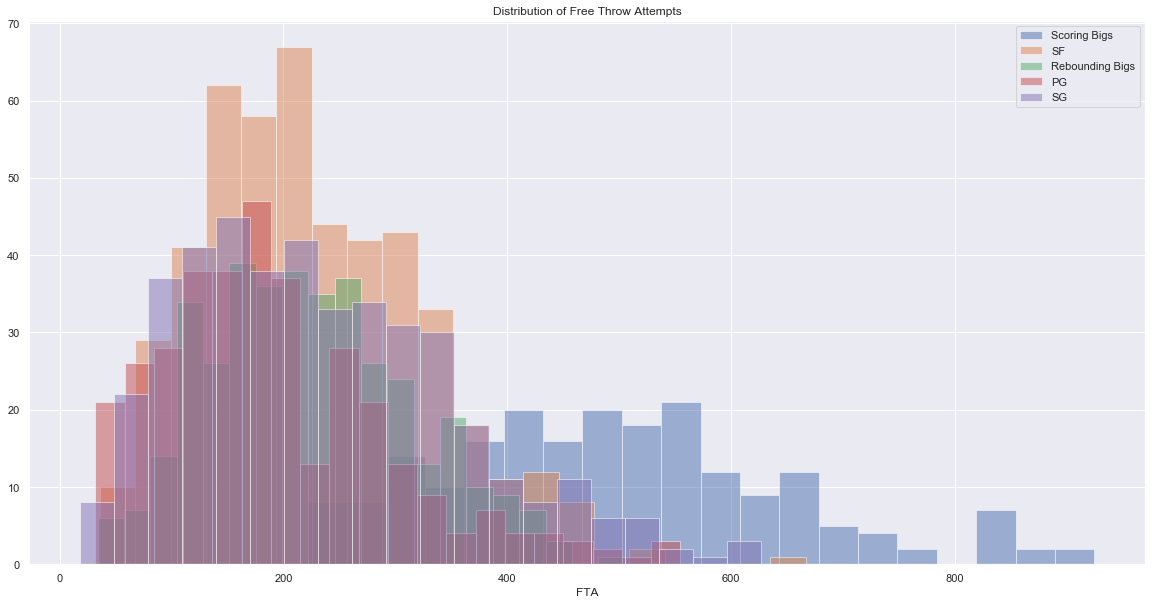

In [64]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Free Throw Attempts')
plt.hist(traditional_0['FTA'], bins=20, label='Scoring Bigs', alpha=0.5)
plt.hist(traditional_1['FTA'], bins=20, label='SF', alpha=0.5)
plt.hist(traditional_2['FTA'], bins=20, label='Rebounding Bigs', alpha=0.5)
plt.hist(traditional_3['FTA'], bins=20, label='PG', alpha=0.5)
plt.hist(traditional_4['FTA'], bins=20, label='SG', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('FTA')
plt.show()

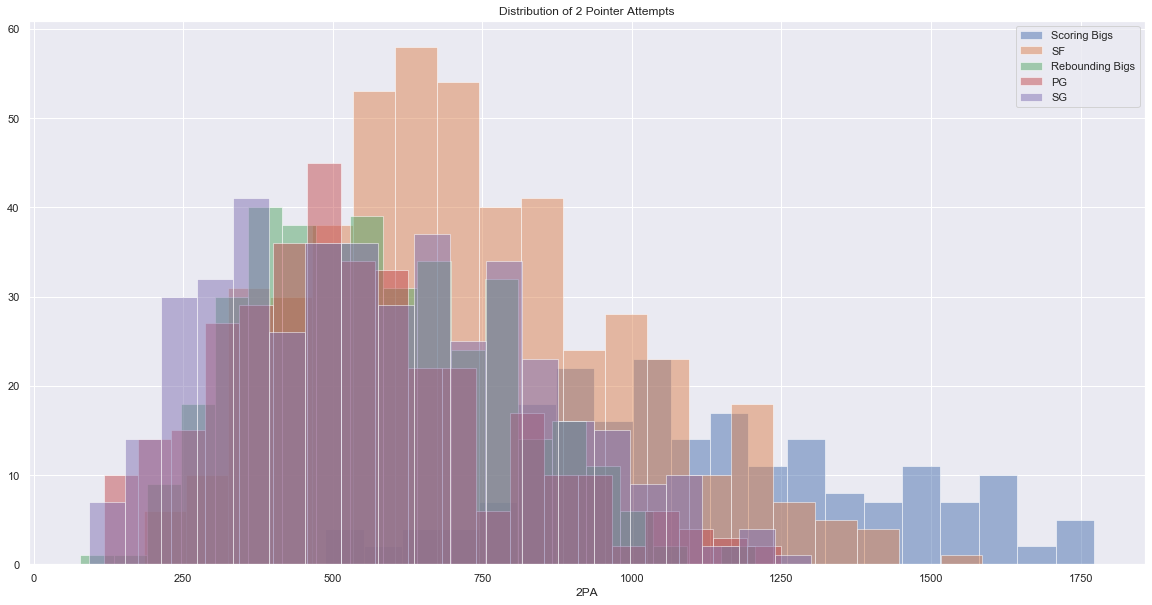

In [65]:
plt.figure(figsize=(20,10))
plt.title('Distribution of 2 Pointer Attempts')
plt.hist(traditional_0['2PA'], bins=20, label='Scoring Bigs', alpha=0.5)
plt.hist(traditional_1['2PA'], bins=20, label='SF', alpha=0.5)
plt.hist(traditional_2['2PA'], bins=20, label='Rebounding Bigs', alpha=0.5)
plt.hist(traditional_3['2PA'], bins=20, label='PG', alpha=0.5)
plt.hist(traditional_4['2PA'], bins=20, label='SG', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('2PA')
plt.show()

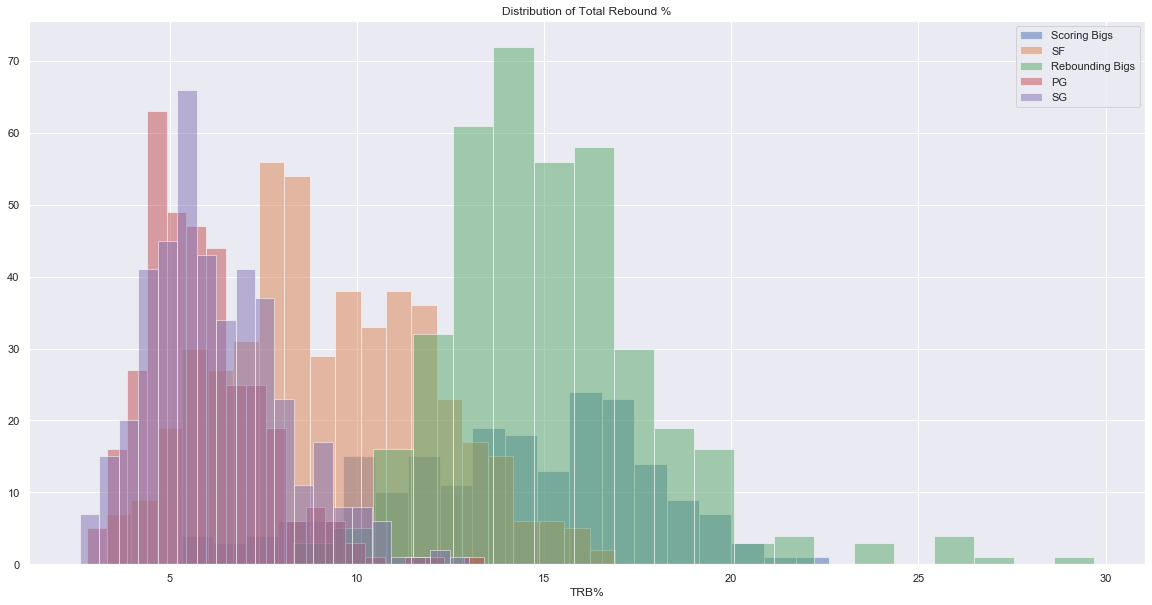

In [66]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Total Rebound %')
plt.hist(traditional_0['TRB%'], bins=20, label='Scoring Bigs', alpha=0.5)
plt.hist(traditional_1['TRB%'], bins=20, label='SF', alpha=0.5)
plt.hist(traditional_2['TRB%'], bins=20, label='Rebounding Bigs', alpha=0.5)
plt.hist(traditional_3['TRB%'], bins=20, label='PG', alpha=0.5)
plt.hist(traditional_4['TRB%'], bins=20, label='SG', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('TRB%')
plt.show()

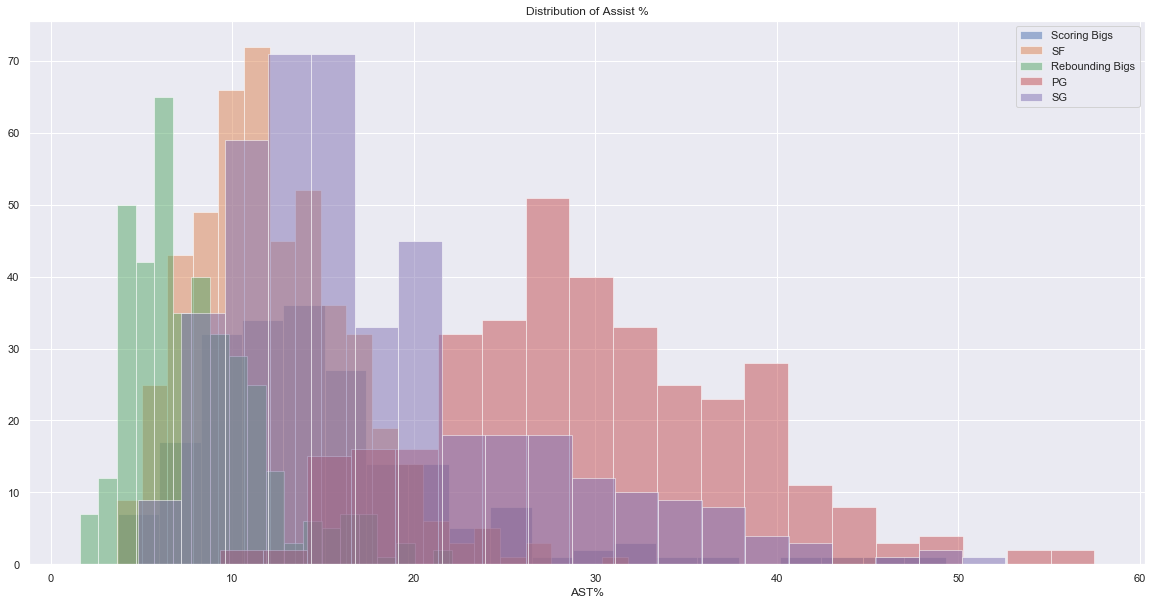

In [67]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Assist %')
plt.hist(traditional_0['AST%'], bins=20, label='Scoring Bigs', alpha=0.5)
plt.hist(traditional_1['AST%'], bins=20, label='SF', alpha=0.5)
plt.hist(traditional_2['AST%'], bins=20, label='Rebounding Bigs', alpha=0.5)
plt.hist(traditional_3['AST%'], bins=20, label='PG', alpha=0.5)
plt.hist(traditional_4['AST%'], bins=20, label='SG', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('AST%')
plt.show()

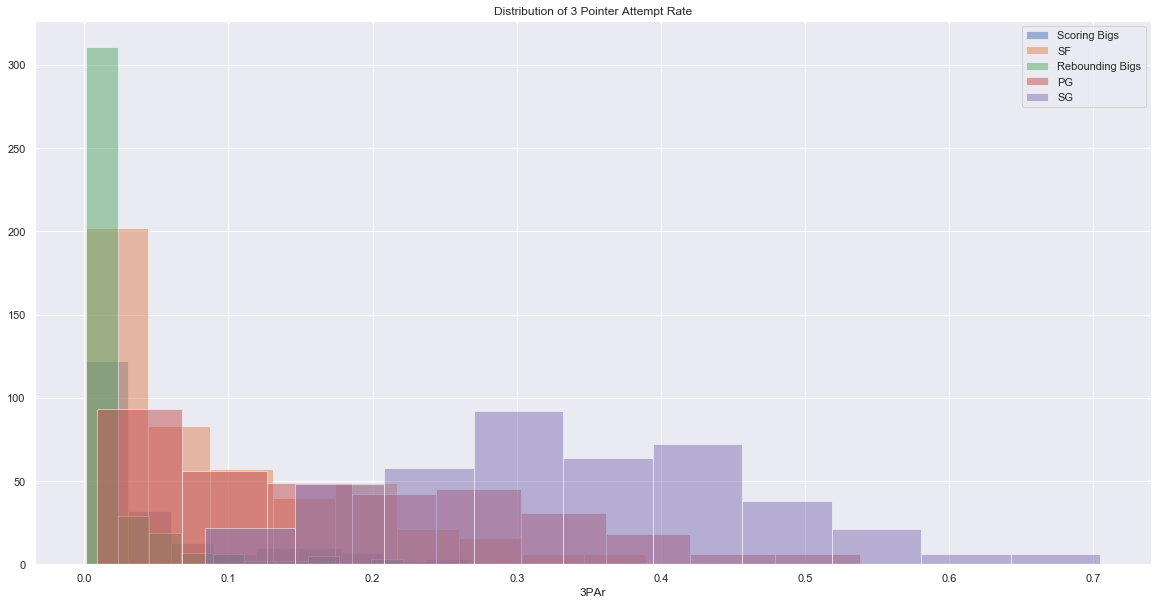

In [68]:
plt.figure(figsize=(20,10))
plt.title('Distribution of 3 Pointer Attempt Rate')
plt.hist(traditional_0['3PAr'], bins=10, label='Scoring Bigs', alpha=0.5)
plt.hist(traditional_1['3PAr'], bins=10, label='SF', alpha=0.5)
plt.hist(traditional_2['3PAr'], bins=10, label='Rebounding Bigs', alpha=0.5)
plt.hist(traditional_3['3PAr'], bins=10, label='PG', alpha=0.5)
plt.hist(traditional_4['3PAr'], bins=10, label='SG', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('3PAr')
plt.show()

<h2><center>
        Analysis of Clustering and Distribution of Modern Players 
    </center></h2>

In [69]:
display_side_by_side(modern_cluster_dummies.corr().cluster_0.nlargest(6).drop(labels='cluster_0').to_frame(),
                     modern_cluster_dummies.corr().cluster_1.nlargest(6).drop(labels='cluster_1').to_frame(),
                     modern_cluster_dummies.corr().cluster_2.nlargest(6).drop(labels='cluster_2').to_frame(),
                     modern_cluster_dummies.corr().cluster_3.nlargest(6).drop(labels='cluster_3').to_frame(),
                     modern_cluster_dummies.corr().cluster_4.nlargest(6).drop(labels='cluster_4').to_frame())

,cluster_0
TRB%,0.417621
DRB%,0.416440
ORB%,0.359905
BLK%,0.333453
TRB,0.307898
,cluster_1
ORB%,0.708232
ORB,0.679256
FG%,0.653906
TRB%,0.618188


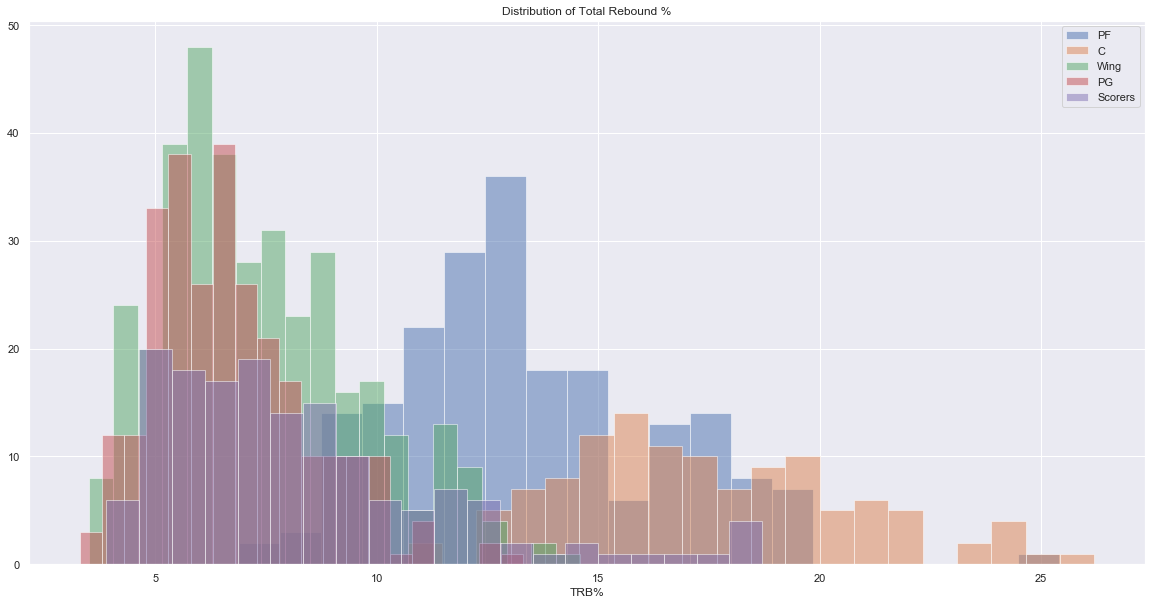

In [70]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Total Rebound %')
plt.hist(modern_0['TRB%'], bins=20, label='PF', alpha=0.5)
plt.hist(modern_1['TRB%'], bins=20, label='C', alpha=0.5)
plt.hist(modern_2['TRB%'], bins=20, label='Wing', alpha=0.5)
plt.hist(modern_3['TRB%'], bins=20, label='PG', alpha=0.5)
plt.hist(modern_4['TRB%'], bins=20, label='Scorers', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('TRB%')
plt.show()

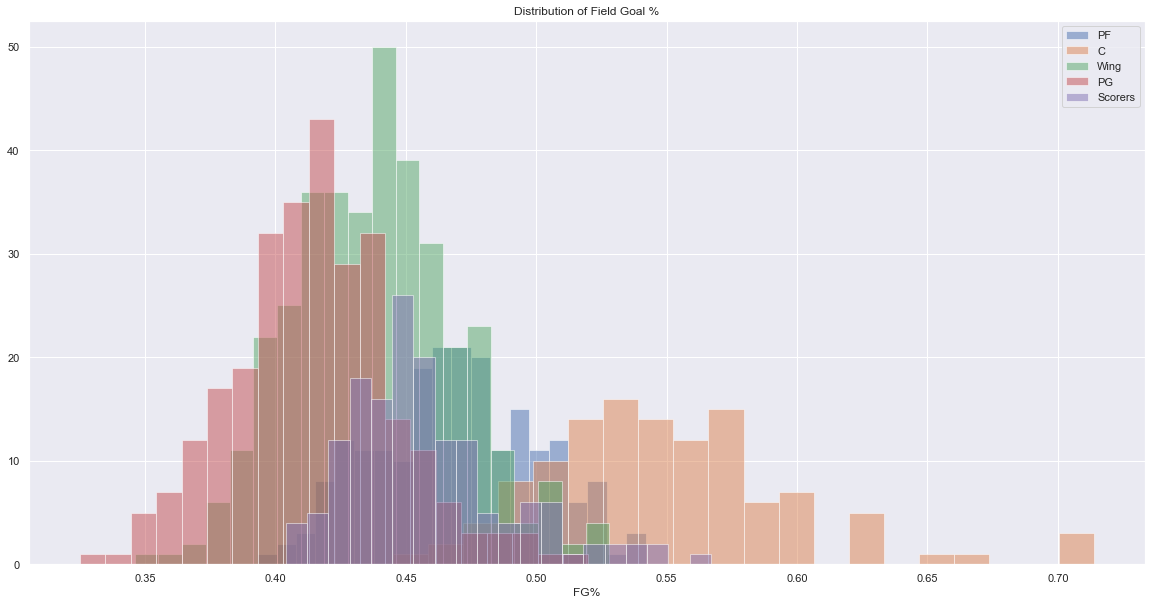

In [71]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Field Goal %')
plt.hist(modern_0['FG%'], bins=20, label='PF', alpha=0.5)
plt.hist(modern_1['FG%'], bins=20, label='C', alpha=0.5)
plt.hist(modern_2['FG%'], bins=20, label='Wing', alpha=0.5)
plt.hist(modern_3['FG%'], bins=20, label='PG', alpha=0.5)
plt.hist(modern_4['FG%'], bins=20, label='Scorers', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('FG%')
plt.show()

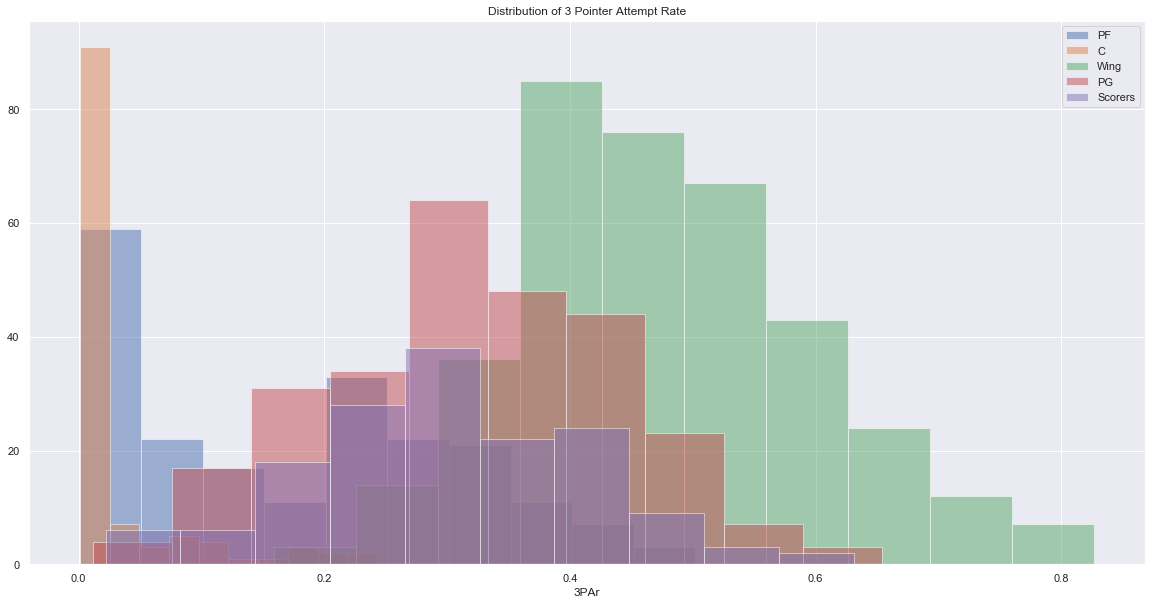

In [72]:
plt.figure(figsize=(20,10))
plt.title('Distribution of 3 Pointer Attempt Rate')
plt.hist(modern_0['3PAr'], bins=10, label='PF', alpha=0.5)
plt.hist(modern_1['3PAr'], bins=10, label='C', alpha=0.5)
plt.hist(modern_2['3PAr'], bins=10, label='Wing', alpha=0.5)
plt.hist(modern_3['3PAr'], bins=10, label='PG', alpha=0.5)
plt.hist(modern_4['3PAr'], bins=10, label='Scorers', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('3PAr')
plt.show()

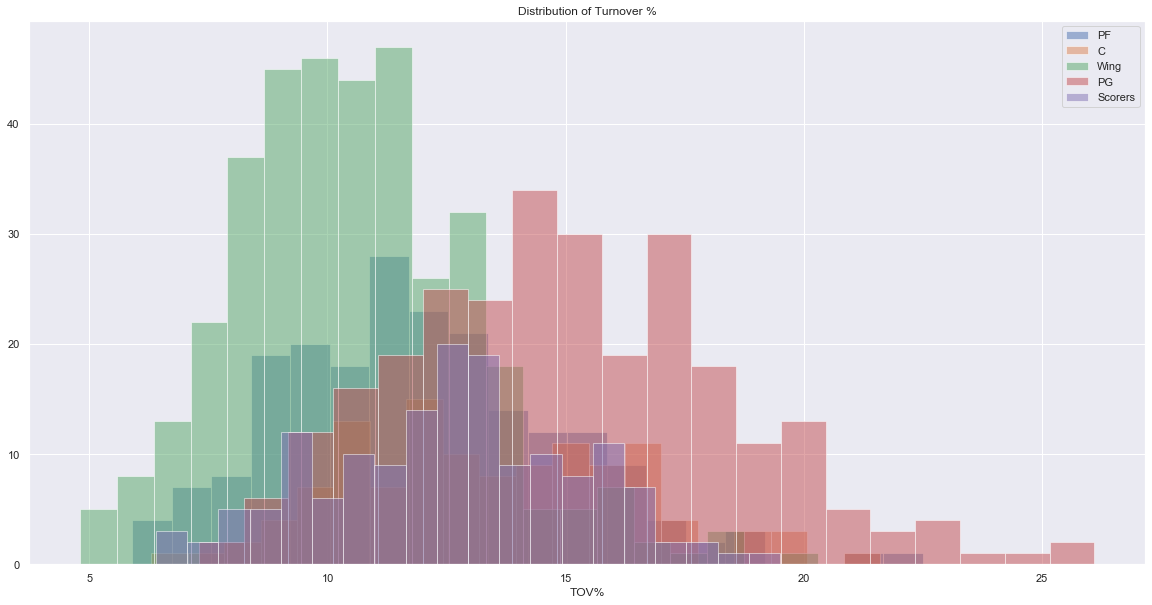

In [73]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Turnover %')
plt.hist(modern_0['TOV%'], bins=20, label='PF', alpha=0.5)
plt.hist(modern_1['TOV%'], bins=20, label='C', alpha=0.5)
plt.hist(modern_2['TOV%'], bins=20, label='Wing', alpha=0.5)
plt.hist(modern_3['TOV%'], bins=20, label='PG', alpha=0.5)
plt.hist(modern_4['TOV%'], bins=20, label='Scorers', alpha=0.5)
plt.xlabel('TOV%')
plt.legend(loc='best')
plt.show()

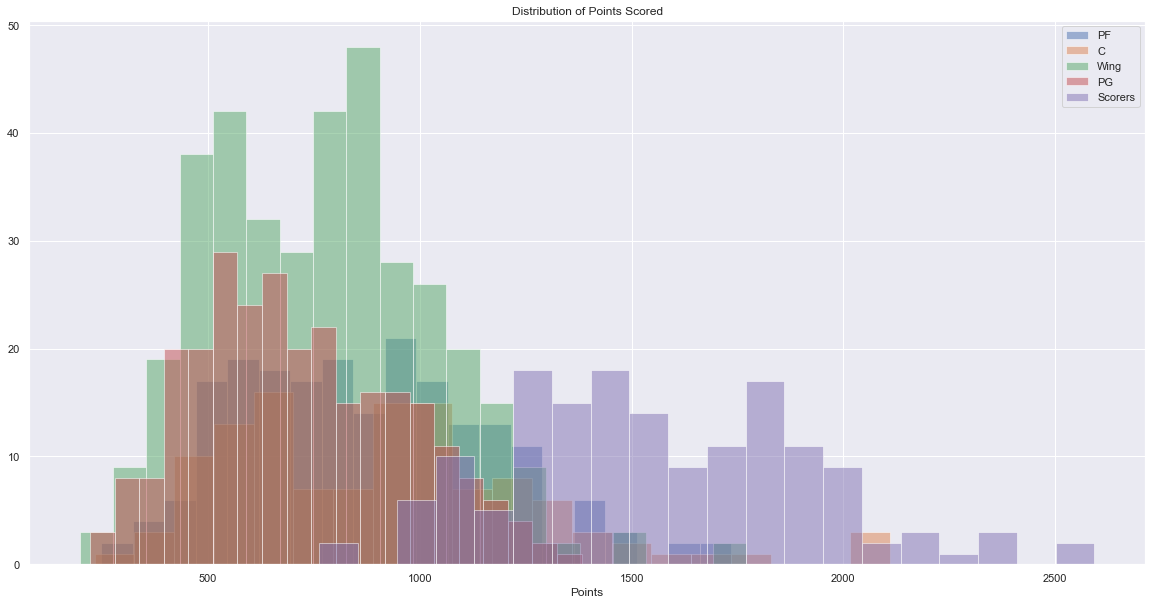

In [74]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Points Scored')
plt.hist(modern_0['PTS'], bins=20, label='PF', alpha=0.5)
plt.hist(modern_1['PTS'], bins=20, label='C', alpha=0.5)
plt.hist(modern_2['PTS'], bins=20, label='Wing', alpha=0.5)
plt.hist(modern_3['PTS'], bins=20, label='PG', alpha=0.5)
plt.hist(modern_4['PTS'], bins=20, label='Scorers', alpha=0.5)
plt.xlabel('Points')
plt.legend(loc='best')
plt.show()

<h2><center>
        Comparison Between Clustering and Distribution of Traditional and Modern Players
    </center></h2>

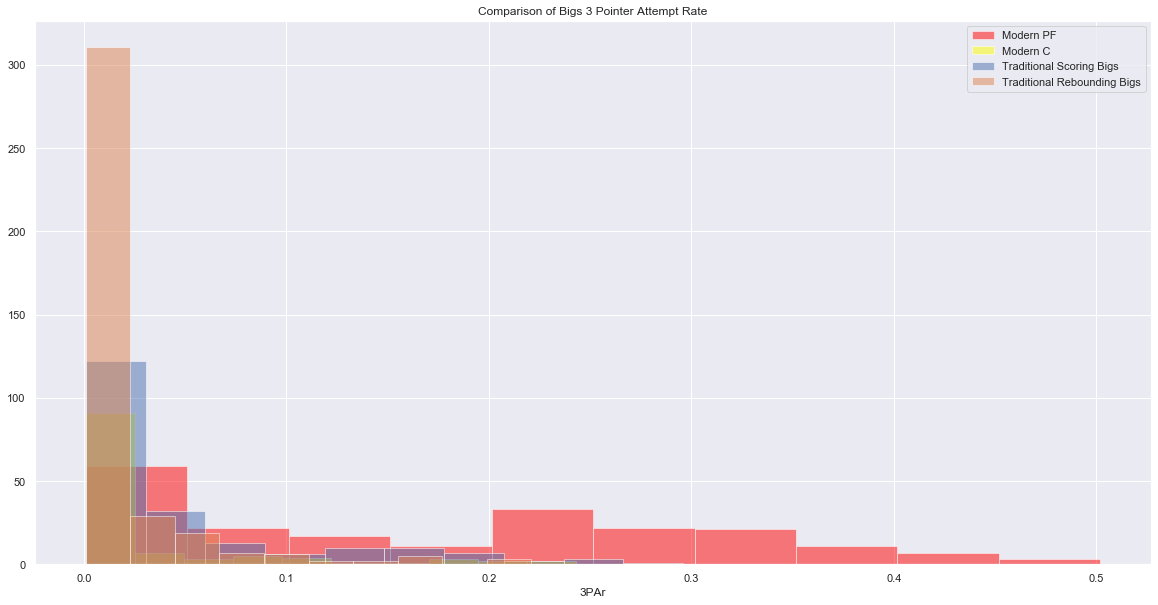

In [75]:
plt.figure(figsize=(20,10))
plt.title('Comparison of Bigs 3 Pointer Attempt Rate')
plt.hist(modern_0['3PAr'], bins=10, label='Modern PF', alpha=0.5, color='red')
plt.hist(modern_1['3PAr'], bins=10, label='Modern C', alpha=0.5, color='yellow')
plt.hist(traditional_0['3PAr'], bins=10, label='Traditional Scoring Bigs', alpha=0.5)
plt.hist(traditional_2['3PAr'], bins=10, label='Traditional Rebounding Bigs', alpha=0.5)
plt.xlabel('3PAr')
plt.legend(loc='best')
plt.show()

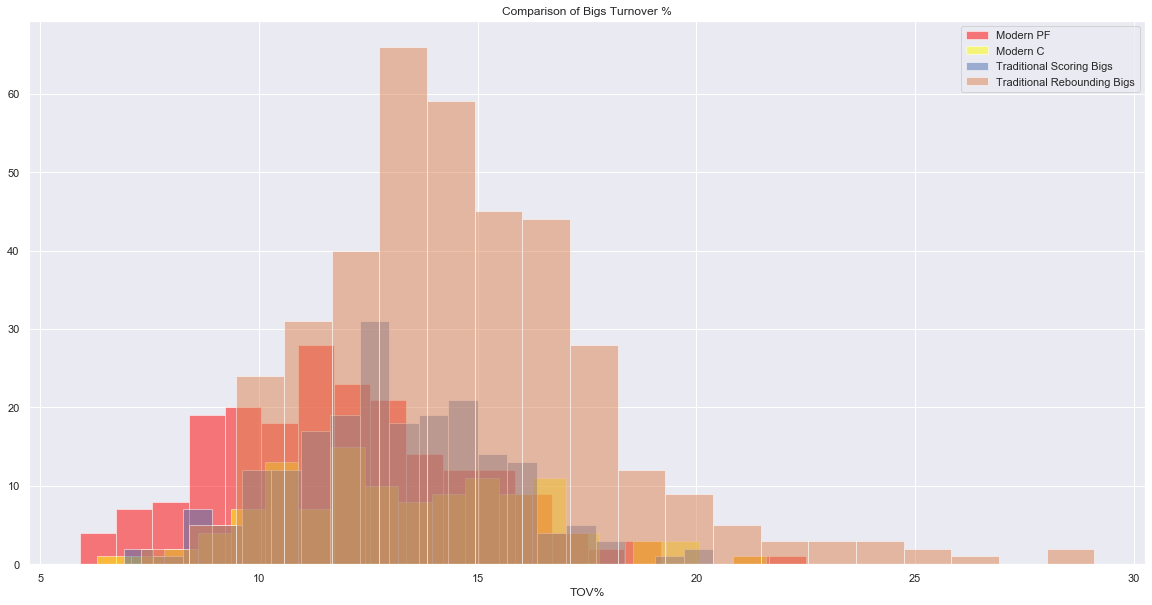

In [76]:
plt.figure(figsize=(20,10))
plt.title('Comparison of Bigs Turnover %')
plt.hist(modern_0['TOV%'], bins=20, label='Modern PF', alpha=.5, color='red')
plt.hist(modern_1['TOV%'], bins=20, label='Modern C', alpha=.5, color='yellow')
plt.hist(traditional_0['TOV%'], bins=20, label='Traditional Scoring Bigs', alpha=0.5)
plt.hist(traditional_2['TOV%'], bins=20, label='Traditional Rebounding Bigs', alpha=0.5)
plt.xlabel('TOV%')
plt.legend(loc='best')
plt.show()

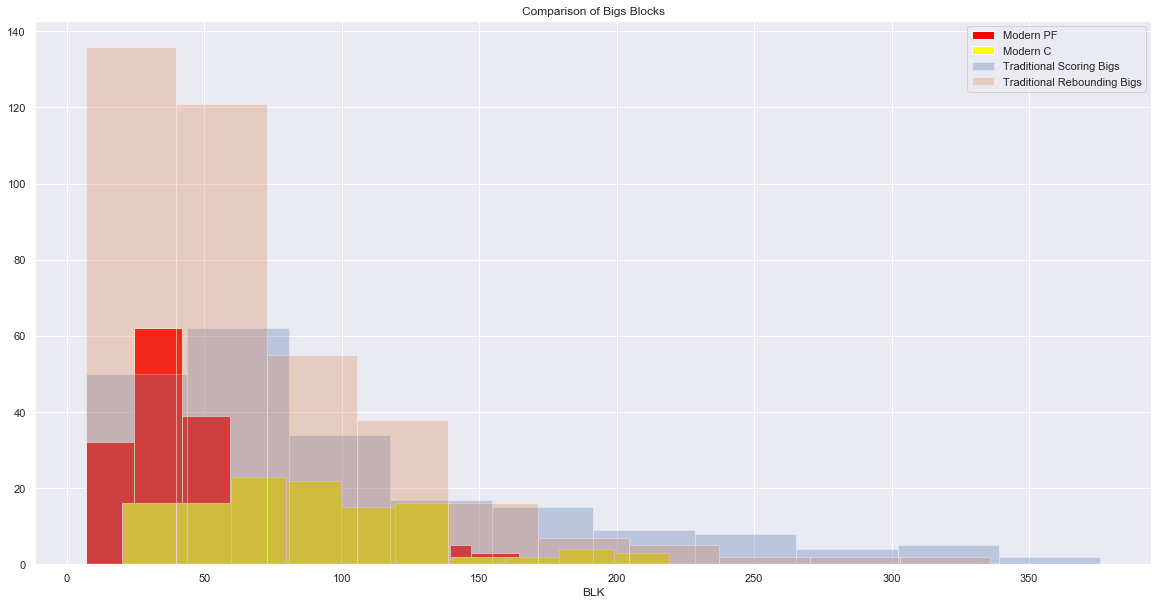

In [77]:
plt.figure(figsize=(20,10))
plt.title('Comparison of Bigs Blocks')
plt.hist(modern_0['BLK'], bins=10, label='Modern PF', alpha=1, color='red')
plt.hist(modern_1['BLK'], bins=10, label='Modern C', alpha=1, color='yellow')
plt.hist(traditional_0['BLK'], bins=10, label='Traditional Scoring Bigs', alpha=0.3)
plt.hist(traditional_2['BLK'], bins=10, label='Traditional Rebounding Bigs', alpha=0.3)
plt.xlabel('BLK')
plt.legend(loc='best')
plt.show()

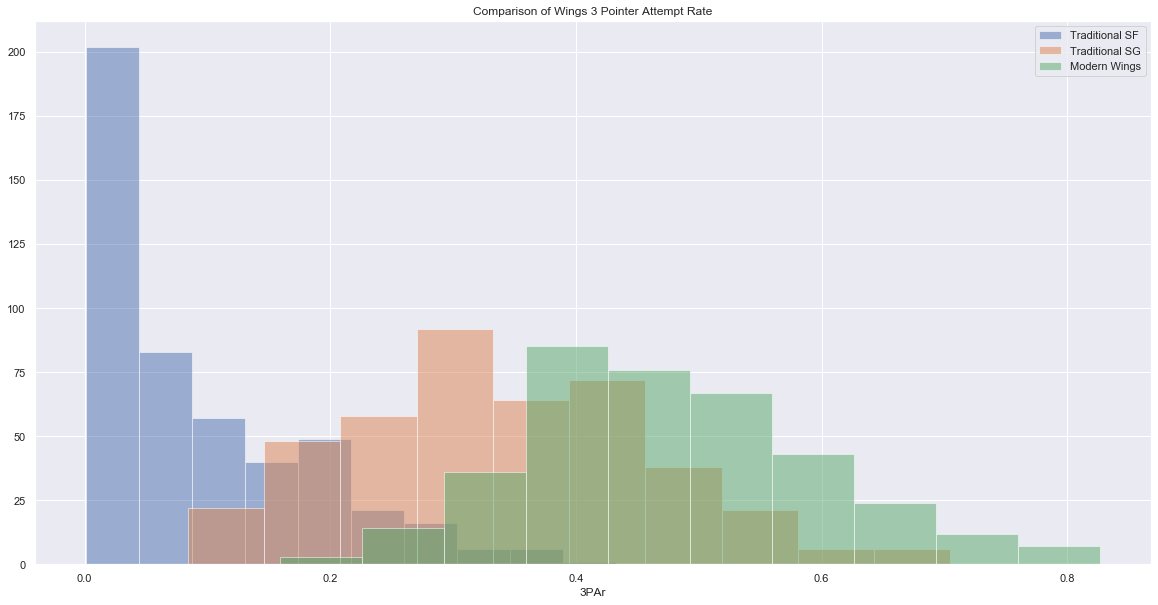

In [78]:
plt.figure(figsize=(20,10))
plt.title('Comparison of Wings 3 Pointer Attempt Rate')
plt.hist(traditional_1['3PAr'], bins=10, label='Traditional SF', alpha=0.5)
plt.hist(traditional_4['3PAr'], bins=10, label='Traditional SG', alpha=0.5)
plt.hist(modern_2['3PAr'], bins=10, label='Modern Wings', alpha=0.5)
plt.xlabel('3PAr')
plt.legend(loc='best')
plt.show()

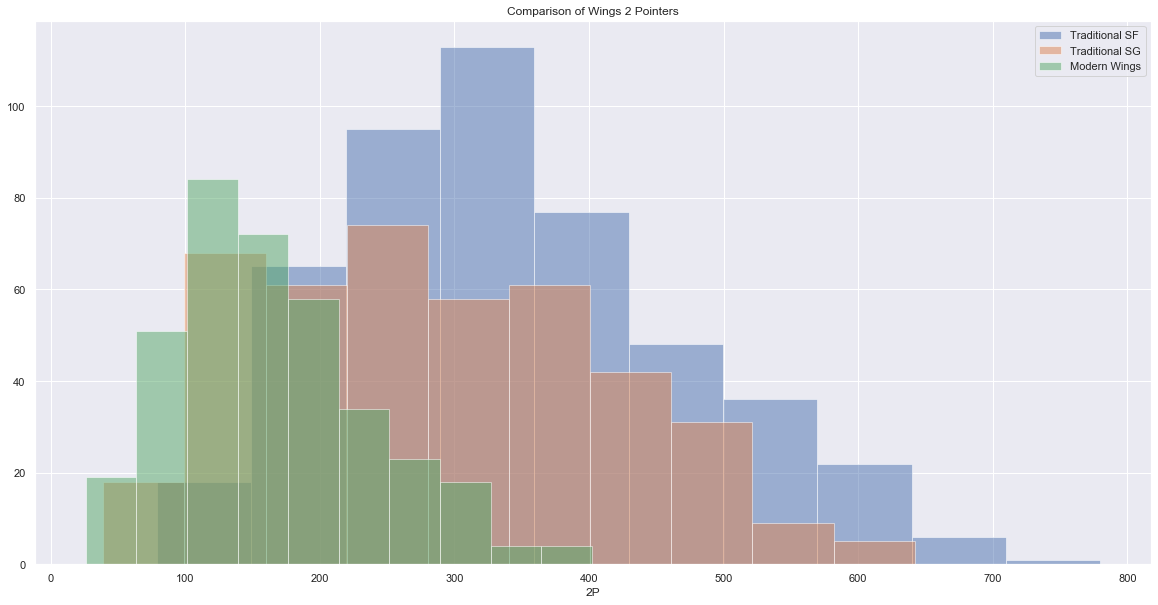

In [79]:
plt.figure(figsize=(20,10))
plt.title('Comparison of Wings 2 Pointers')
plt.hist(traditional_1['2P'], bins=10, label='Traditional SF', alpha=0.5)
plt.hist(traditional_4['2P'], bins=10, label='Traditional SG', alpha=0.5)
plt.hist(modern_2['2P'], bins=10, label='Modern Wings', alpha=0.5)
plt.xlabel('2P')
plt.legend(loc='best')
plt.show()

<h2><center>
    Conclusion
    </center></h2>

- Evolution of certain positions is observable
- Power forwards have become more specialized from centers
- Post players have developed more versatile skills
- Shooting Guards and wings are merging into a singular wing role

discuss ways to improve first: clusters are not 100% indicative of positions, lots of players listed positions not necessarily how they are used, player positions change with seasons